In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('Train.csv')
test  = pd.read_csv('Test.csv')
train.shape, test.shape

((87020, 26), (37717, 24))

In [8]:
data = pd.concat([train, test], ignore_index=True)
data.shape
data.dtypes

City                      object
DOB                       object
Device_Type               object
Disbursed                float64
EMI_Loan_Submitted       float64
Employer_Name             object
Existing_EMI             float64
Filled_Form               object
Gender                    object
ID                        object
Interest_Rate            float64
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Amount_Submitted    float64
Loan_Tenure_Applied      float64
Loan_Tenure_Submitted    float64
LoggedIn                 float64
Mobile_Verified           object
Monthly_Income             int64
Processing_Fee           float64
Salary_Account            object
Source                    object
Var1                      object
Var2                      object
Var4                       int64
Var5                       int64
dtype: object

In [7]:
data.apply(lambda x : sum(x.isnull()))

City                      1401
DOB                          0
Device_Type                  0
Disbursed                37717
EMI_Loan_Submitted       84901
Employer_Name              113
Existing_EMI               111
Filled_Form                  0
Gender                       0
ID                           0
Interest_Rate            84901
Lead_Creation_Date           0
Loan_Amount_Applied        111
Loan_Amount_Submitted    49535
Loan_Tenure_Applied        111
Loan_Tenure_Submitted    49535
LoggedIn                 37717
Mobile_Verified              0
Monthly_Income               0
Processing_Fee           85346
Salary_Account           16801
Source                       0
Var1                         0
Var2                         0
Var4                         0
Var5                         0
dtype: int64

In [12]:
var = ['Gender','Salary_Account','Mobile_Verified','Var1','Filled_Form','Device_Type','Var2','Source']
for v in var:
    print '\nFrequency count for variable {0} having {1} objects'.format(v,len(train[v].unique()))
    print data[v].value_counts()


Frequency count for variable Gender having 2 objects
Male      71398
Female    53339
Name: Gender, dtype: int64

Frequency count for variable Salary_Account having 58 objects
HDFC Bank                                          25180
ICICI Bank                                         19547
State Bank of India                                17110
Axis Bank                                          12590
Citibank                                            3398
Kotak Bank                                          2955
IDBI Bank                                           2213
Punjab National Bank                                1747
Bank of India                                       1713
Bank of Baroda                                      1675
Standard Chartered Bank                             1434
Canara Bank                                         1385
Union Bank of India                                 1330
Yes Bank                                            1120
ING Vysya                 

In [13]:
#drop city column with inplace true 
data.drop('City',axis=1,inplace=True)

In [14]:
data['Age'] = data['DOB'].apply(lambda x:115-int(x[-2:]))
data.drop('DOB',axis=1,inplace=True)

In [15]:
data['EMI_Loan_Submitted_Missing'] = data['EMI_Loan_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data[['EMI_Loan_Submitted','EMI_Loan_Submitted_Missing']].head(10)

,EMI_Loan_Submitted,EMI_Loan_Submitted_Missing
0,NaN,1
1,6762.90,0
2,NaN,1
3,NaN,1
4,NaN,1
5,6978.92,0
6,NaN,1
7,NaN,1
8,30824.65,0
9,10883.38,0


In [16]:
#droping feature due to lot of unique vaulues or null values
data.drop('EMI_Loan_Submitted', axis=1, inplace=True)
data.drop('Employer_Name',axis=1, inplace=True)

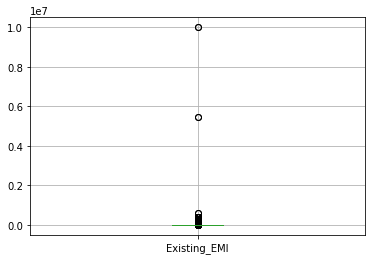

In [19]:
data.boxplot(column='Existing_EMI',return_type='axes')
plt.show()

In [22]:
data['Existing_EMI'].fillna(0, inplace=True)
data['Existing_EMI'].head()

0        0.0
1        0.0
2        0.0
3        0.0
4    25000.0
Name: Existing_EMI, dtype: float64

In [46]:
data['Interest_Rate_New'] = data['Interest_Rate'].apply(lambda x:1 if pd.isnull(x) else 0)
data.drop('Interest_Rate',axis=1,inplace=True)

In [25]:
data.drop('Lead_Creation_Date',axis=1,inplace=True)

In [27]:
data['Loan_Amount_Applied'].fillna(data['Loan_Amount_Applied'].median(),inplace=True)
data['Loan_Tenure_Applied'].fillna(data['Loan_Tenure_Applied'].median(),inplace=True)

In [28]:
data['Loan_Tenure_Submitted_New'] = data['Loan_Tenure_Submitted'].apply(lambda x:1 if pd.isnull(x) else 0)
data['Loan_Amount_Submitted_New'] = data['Loan_Amount_Submitted'].apply(lambda x:1 if pd.isnull(x) else 0)

In [31]:
print data[['Loan_Amount_Submitted','Loan_Amount_Submitted_New']].head()
print data[['Loan_Tenure_Submitted', 'Loan_Tenure_Submitted_New']].head()

   Loan_Amount_Submitted  Loan_Amount_Submitted_New
0                    NaN                          1
1               200000.0                          0
2               450000.0                          0
3               920000.0                          0
4               500000.0                          0
   Loan_Tenure_Submitted  Loan_Tenure_Submitted_New
0                    NaN                          1
1                    2.0                          0
2                    4.0                          0
3                    5.0                          0
4                    2.0                          0


In [32]:
data.drop(['Loan_Amount_Submitted','Loan_Tenure_Submitted'],axis=1,inplace=True)
data.drop('LoggedIn',axis=1,inplace=True)
data.drop('Salary_Account',axis=1,inplace=True)

In [34]:
data['Processing_Fee_New'] = data['Processing_Fee'].apply(lambda x: 1 if pd.isnull(x) else 0)
data[['Processing_Fee_New', 'Processing_Fee']].head()

,Processing_Fee_New,Processing_Fee
0,1,NaN
1,1,NaN
2,1,NaN
3,1,NaN
4,1,NaN


In [35]:
data.drop('Processing_Fee', axis=1, inplace=True)

In [36]:
data['Source'] = data['Source'].apply(lambda x: 'others' if x not in ['S122','S133'] else x)
data['Source'].value_counts()

S122      55249
S133      42900
others    26588
Name: Source, dtype: int64

In [37]:
data.apply(lambda x: sum(x.isnull()))

Device_Type                       0
Disbursed                     37717
Existing_EMI                      0
Filled_Form                       0
Gender                            0
ID                                0
Loan_Amount_Applied               0
Loan_Tenure_Applied               0
Mobile_Verified                   0
Monthly_Income                    0
Source                            0
Var1                              0
Var2                              0
Var4                              0
Var5                              0
Age                               0
EMI_Loan_Submitted_Missing        0
Interest_Rate_New                 0
Loan_Tenure_Submitted_New         0
Loan_Amount_Submitted_New         0
Processing_Fee_New                0
dtype: int64

In [38]:
data.dtypes

Device_Type                    object
Disbursed                     float64
Existing_EMI                  float64
Filled_Form                    object
Gender                         object
ID                             object
Loan_Amount_Applied           float64
Loan_Tenure_Applied           float64
Mobile_Verified                object
Monthly_Income                  int64
Source                         object
Var1                           object
Var2                           object
Var4                            int64
Var5                            int64
Age                             int64
EMI_Loan_Submitted_Missing      int64
Interest_Rate_New               int64
Loan_Tenure_Submitted_New       int64
Loan_Amount_Submitted_New       int64
Processing_Fee_New              int64
dtype: object

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['Device_Type','Filled_Form','Gender','Var1','Var2','Mobile_Verified','Source']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])

In [40]:
data.dtypes

Device_Type                     int64
Disbursed                     float64
Existing_EMI                  float64
Filled_Form                     int64
Gender                          int64
ID                             object
Loan_Amount_Applied           float64
Loan_Tenure_Applied           float64
Mobile_Verified                 int64
Monthly_Income                  int64
Source                          int64
Var1                            int64
Var2                            int64
Var4                            int64
Var5                            int64
Age                             int64
EMI_Loan_Submitted_Missing      int64
Interest_Rate_New               int64
Loan_Tenure_Submitted_New       int64
Loan_Amount_Submitted_New       int64
Processing_Fee_New              int64
dtype: object

In [45]:
data = pd.get_dummies(data, columns=var_to_encode)

In [44]:
data.head()

,Disbursed,Existing_EMI,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,Age,EMI_Loan_Submitted_Missing,...,Var2_2,Var2_3,Var2_4,Var2_5,Var2_6,Mobile_Verified_0,Mobile_Verified_1,Source_0,Source_1,Source_2
0,0.0,0.0,ID000002C20,300000.0,5.0,20000,1,0,37,1,...,0,0,0,0,1,1,0,1,0,0
1,0.0,0.0,ID000004E40,200000.0,2.0,35000,3,13,30,0,...,0,0,0,0,1,0,1,1,0,0
2,0.0,0.0,ID000007H20,600000.0,4.0,22500,1,0,34,1,...,0,0,0,0,0,0,1,0,0,1
3,0.0,0.0,ID000008I30,1000000.0,5.0,35000,3,10,28,1,...,0,0,0,0,0,0,1,0,0,1
4,0.0,25000.0,ID000009J40,500000.0,2.0,100000,3,17,31,1,...,0,0,0,0,0,0,1,0,0,1


In [48]:
train = data[:len(train)]
test = data[len(train):]

In [49]:
train.shape, test.shape

((87020, 51), (37717, 51))

In [50]:
train.to_csv('train_modified.csv')
test.to_csv('test_modified.csv')